In [2]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

Generate some "Real" Data from Gaussian

In [3]:
X = torch.randn((1000,2))
A = torch.tensor([[1, 2], [-0.1, 0.5]])
b = torch.tensor([1, 2])
data = torch.matmul(X, A) + b

Let’s see what we got. This should be a Gaussian shifted in some rather arbitrary way with mean $b$ and covariance matrix $A^\intercal A$.

Covariance matrix : 
 tensor([[1.0100, 1.9500],
        [1.9500, 4.2500]])


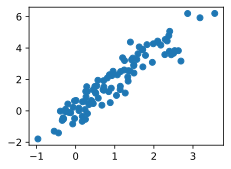

In [4]:
d2l.set_figsize()
d2l.plt.scatter(data[:100, (0)].detach().numpy(), data[:100, (1)].detach().numpy())
print(f'Covariance matrix : \n {torch.matmul(A.T, A)}')

In [5]:
batch_size = 8
data_iter = d2l.load_array((data,), batch_size)

### Generator

In [6]:
net_G = nn.Sequential(nn.Linear(2, 2))

### Discriminator

In [7]:
net_D = nn.Sequential(
    nn.Linear(2, 5), nn.Tanh(),
    nn.Linear(5, 3), nn.Tanh(),
    nn.Linear(3, 1)
)

### Training

Discriminator Update

In [8]:
#@save
def update_D(X, Z, net_D, net_G, loss, trainer_D):
    """Update Discriminator"""
    batch_size = X.shape[0]
    ones = torch.ones((batch_size,), device= X.device)
    zeros = torch.zeros((batch_size), device=X.device)
    trainer_D.zero_grad()
    real_Y = net_D(X)
    fake_X = net_G(Z)
    # Do not need to compute gradient for `net_G`, detach it from computing gradients
    fake_Y = net_D(fake_X.detach())
    loss_D = (loss(real_Y, ones.reshape(real_Y.shape)) +
              loss(fake_Y, zeros.reshape(fake_Y.shape))) / 2
    loss_D.backward()
    trainer_D.step()
    return loss_D

Generator Training

In [22]:
#@save
def update_G(Z, net_D, net_G, loss, trainer_G):
    """Update Generator"""
    batch_size = Z.shape[0]
    ones = torch.ones((batch_size,), device=Z.device)
    trainer_G.zero_grad()
    # We could reuse `fake_X` from `update_D` to save computation
    fake_X = net_G(Z)
    # Recomputing `fake_Y` is needed since `net_D` is changed
    fake_Y = net_D(fake_X)
    loss_G = loss(fake_Y, ones.reshape(fake_Y.shape))
    loss_G.backward()
    trainer_G.step()
    return loss_G

In [23]:

def train(net_D, net_G, data_iter, num_epochs, lr_D, lr_G, latent_dim, data):
    loss = nn.BCEWithLogitsLoss(reduction='sum')
    for w in net_D.parameters():
        nn.init.normal_(w, 0, 0.02)
    for w in net_G.parameters():
        nn.init.normal_(w, 0, 0.02)
    trainer_D = torch.optim.Adam(net_D.parameters(), lr=lr_D)
    trainer_G = torch.optim.Adam(net_G.parameters(), lr=lr_G)

SyntaxError: expected ':' (3848925082.py, line 1)